## Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import math

In [4]:
df = pd.read_csv('Data/Dataset 7 Fecundity of fruit flies.csv')

## Data analysis and pre-processing

In [5]:
df.drop(columns=['Unnamed: 3'], inplace=True)

First, we want to see what data we work with. For that we can df.info() methods to see the data types (and can determine if there is a need to tranform them)

In [6]:
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   resistant    25 non-null     float64
 1   susceptible  25 non-null     float64
 2   nonselected  25 non-null     float64
dtypes: float64(3)
memory usage: 732.0 bytes
None


,resistant,susceptible,nonselected
0,12.8,38.4,35.4
1,21.6,32.9,27.4
2,14.8,48.5,19.3
3,23.1,20.9,41.8
4,34.6,11.6,20.3


The data look really goood and no initial transormation is needed. Thus, for easier access, we will split column into a series.

In [7]:
# Separate data into RS, SS, and NS
RS = df['resistant']
SS = df['susceptible']
NS = df['nonselected']

# Analysis

## Overview of the dataset

We will start with basica analysis of the dataset: means, std, counts, and basics plots



---

The first thing is to see overall information about dataset, for that we'll use describe() method from pandas library

In [8]:
df.describe()

,resistant,susceptible,nonselected
count,25.000000,25.000000,25.000000
mean,25.256000,23.628000,33.372000
std,7.772391,9.768466,8.942013
min,12.800000,10.800000,14.900000
25%,20.300000,16.000000,28.200000
50%,23.600000,22.500000,34.400000
75%,29.300000,30.200000,37.900000
max,44.400000,48.500000,51.800000


Here we can see that the number of rows of data in all column are the same, which is good for us. The means and std are different, and therefore we should look closely into them later.

For now we can also look at the data disctribution and some basic plots

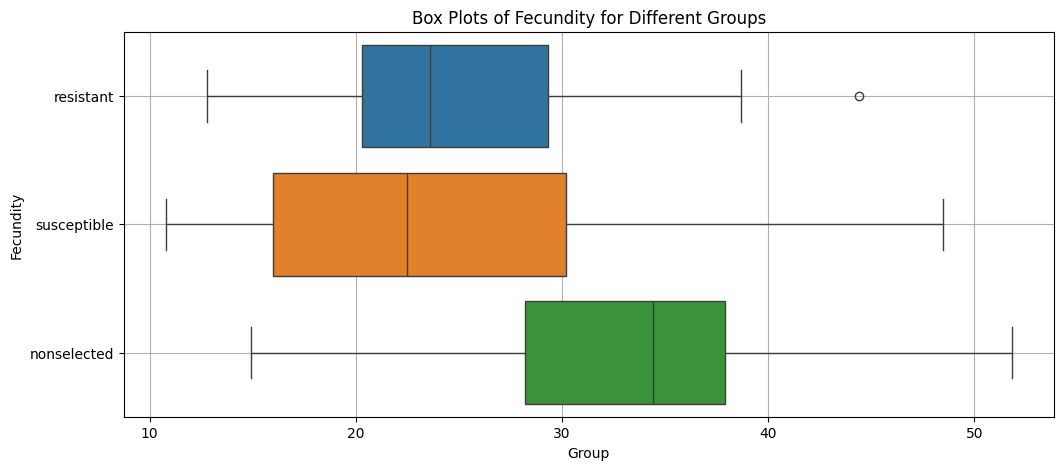

In [9]:
# boxplot
plt.figure(figsize=(12, 5))
sns.boxplot(data=[RS,SS,NS], orient='h')
plt.title('Box Plots of Fecundity for Different Groups')
plt.ylabel('Fecundity')
plt.xlabel('Group')
plt.grid('True')
plt.show()

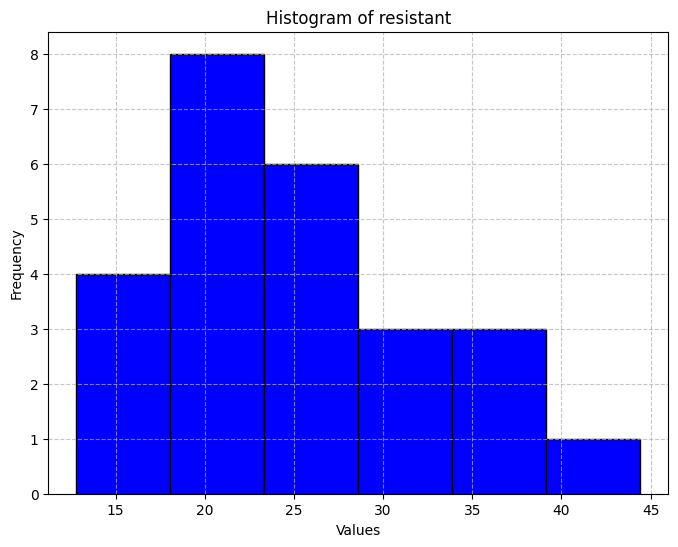

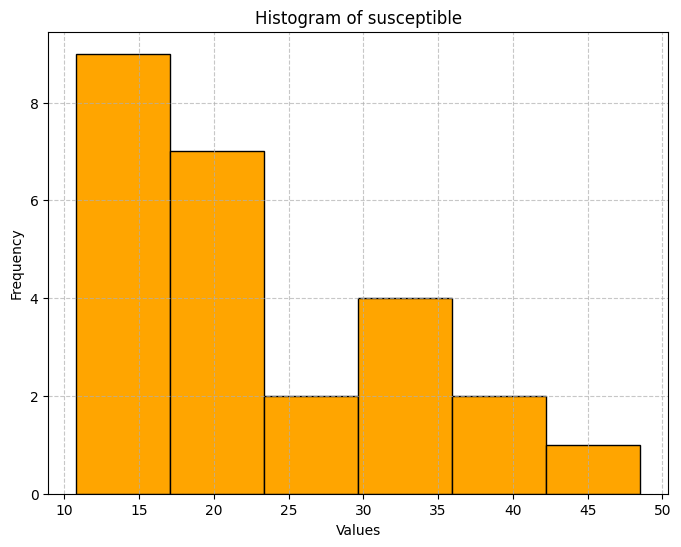

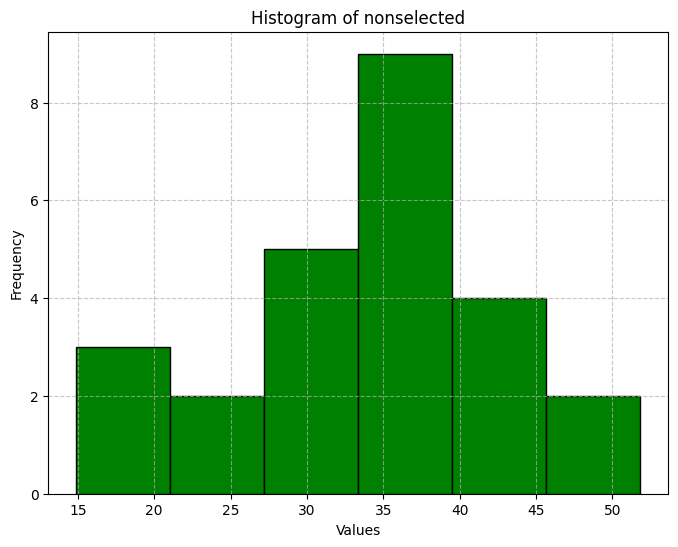

In [10]:
colors = ['blue', 'orange', 'green']

# histogram for each column with a unique color
for i, column in enumerate(df.columns):
    plt.figure(figsize=(8, 6))
    sns.histplot(df[column], kde=False, bins='auto', alpha=1, color=colors[i])
    plt.title(f"Histogram of {column}")
    plt.xlabel("Values")
    plt.ylabel("Frequency")
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

In [11]:
# to count number of data inputs

rs_count = RS.count()
ss_count = SS.count()
ns_count = NS.count()

rs_count, ss_count, ns_count

(25, 25, 25)

Now lets calculate some data for further analysis and save then into varibles thus we can use them later

In [12]:
rs_mean = RS.mean()
ss_mean = SS.mean()
ns_mean = NS.mean()

#overall mean
overall_mean = (rs_mean + ss_mean + ns_mean)/3

rs_mean, ss_mean, ns_mean, overall_mean

(25.256000000000004, 23.627999999999997, 33.372, 27.418666666666667)

Now lests calculate the standart deviation and other metrics

In [13]:
def calculate_std_dev(data):
  n = len(data)
  if n == 0:
    return 0  # handle empty data case

  mean = sum(data) / n
  variance = sum([(x - mean) ** 2 for x in data]) / n
  std_dev = math.sqrt(variance)
  return std_dev

rs_std_dev = calculate_std_dev(RS.dropna().tolist()) # handle potential NaN values
ss_std_dev = calculate_std_dev(SS.dropna().tolist())
ns_std_dev = calculate_std_dev(NS.dropna().tolist())

rs_std_dev, ss_std_dev, ns_std_dev

(7.615357115723464, 9.571103175705506, 8.761347841513883)

In [14]:
import math

k = df.shape[1]  # number of groups
n = rs_count + ss_count + ns_count  # total number of observations

# Variances for each group (square of standard deviation)
rs_variance = rs_std_dev ** 2
ss_variance = ss_std_dev ** 2
ns_variance = ns_std_dev ** 2

# Degrees of freedom for each group
df_rs = rs_count - 1
df_ss = ss_count - 1
df_ns = ns_count - 1

# Pooled standard deviation calculation
pooled_variance = (
    (df_rs * rs_variance) +
    (df_ss * ss_variance) +
    (df_ns * ns_variance)
) / (n - k)  # n - k is the total degrees of freedom

s_pooled = math.sqrt(pooled_variance)

print(f"Pooled Standard Deviation (s_pooled): {s_pooled}")

Pooled Standard Deviation (s_pooled): 8.686405010129334


In [15]:
SS_within = (
    (rs_count - 1) * rs_variance +
    (ss_count - 1) * ss_variance +
    (ns_count - 1) * ns_variance
)

print((rs_count - 1) * rs_variance)
print((ss_count - 1) * ss_variance)
print((ns_count - 1) * ns_variance)

SS_within

1391.847936
2198.5443840000007
1842.2691839999993


5432.661504

Now, as we have several column and their means, we can also try ANOVE one side test, for taht we'll also need to calculate SSR

In [16]:
# calculate SS_between
SS_between = rs_count * (rs_mean - overall_mean)**2 + ss_count * (ss_mean - overall_mean)**2 + ns_count * (ns_mean - overall_mean)**2
print("SS_between:", SS_between)

SS_between: 1362.2114666666666


Step 4: Calculate SST.

In [17]:
SS_total = SS_between + SS_within
print("SS_toatl:", SS_total)

SS_toatl: 6794.872970666666


Step 5: Fill in the ANOVA table.

In [18]:
# the actuall ANOVA one way table
from scipy.stats import f

k = df.shape[1]  # number of groups
n = rs_count + ss_count + ns_count  # total number of observations

# degrees of freedom
df_between = k - 1
df_within = n - k
df_total = n - 1

# mean squares
MS_between = SS_between / df_between
MS_within = SS_within / df_within

# F-statistic
F = MS_between / MS_within

# p-value is calculated using approximation, as we are not using scipy.stats
# yet in a more accurate way, we'd use a statistical table for accurate p-value.

p_value = f.sf(F, df_between, df_within)

# ANOVA table as a data frame
anova_table = pd.DataFrame({
    'Source': ['Between Groups', 'Within Groups', 'Total'],
    'Sum of Squares': [SS_between, SS_within, SS_total],
    'Degrees of Freedom': [df_between, df_within, df_total],
    'Mean Square': [MS_between, MS_within, ''],  # Mean Square for Total is not defined
    'F-statistic': [F, '', ''],
    'p-value': [p_value, '', '']
})


anova_table

,Source,Sum of Squares,Degrees of Freedom,Mean Square,F-statistic,p-value
0,Between Groups,1362.211467,2,681.105733,9.026812,0.000318
1,Within Groups,5432.661504,72,75.453632,,
2,Total,6794.872971,74,,,


In [19]:
if p_value < 0.05:
    print("The differences between the groups are statistically significant.")
else:
    print("The differences between the groups are not statistically significant.")


The differences between the groups are statistically significant.


Normality check:
1) Quantile plot
2) Shapiro test

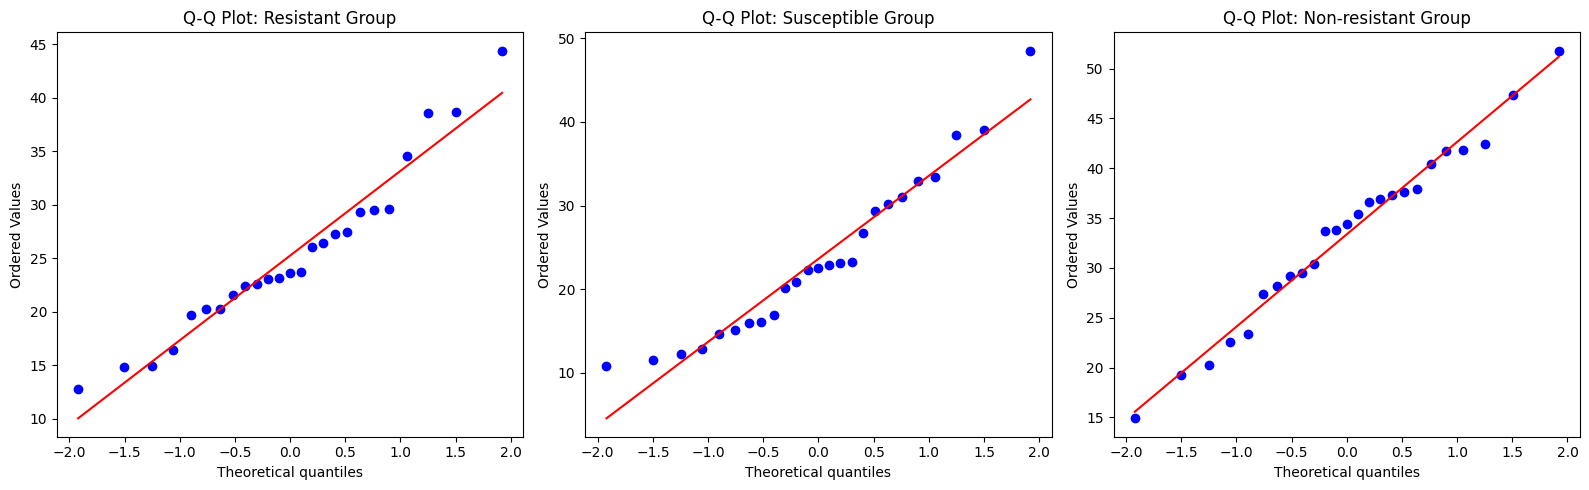

In [30]:
import matplotlib.pyplot as plt
import scipy.stats as stats

# Create Q-Q plots for resistant and susceptible groups
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# Q-Q plot for resistant group
stats.probplot(RS, dist="norm", plot=axes[0])
axes[0].set_title("Q-Q Plot: Resistant Group")

# Q-Q plot for susceptible group
stats.probplot(SS, dist="norm", plot=axes[1])
axes[1].set_title("Q-Q Plot: Susceptible Group")

# Q-Q plot for susceptible group
stats.probplot(NS, dist="norm", plot=axes[2])
axes[2].set_title("Q-Q Plot: Non-resistant Group")

plt.tight_layout()
plt.show()


The quantile plots show that the data aligns closely to a straight line for both cases. From this we can infere that thw data follows a normal distribution.\
To double check this, we can do a Shapiro-Wilk test, which follows:

In [31]:
from scipy.stats import shapiro, levene, ttest_ind

# Check for normality using Shapiro-Wilk test
normality_resistant = shapiro(RS)
normality_susceptible = shapiro(SS)

normality_resistant, normality_susceptible


(ShapiroResult(statistic=0.9495586099607479, pvalue=0.245042108356689),
 ShapiroResult(statistic=0.9395615849093654, pvalue=0.14461774945339412))

Both p-values are greater than 0.05, therefore the data is normally distributed. Explanation on this on the overleaf document.

Analyisis for Part 2: Did the line selected for resistance differ in fecundity from the line selected for susceptibility?
H0: RS = SS , H1: RS =! SS
We perform a t-test:

In [32]:
diff_means = rs_mean - ss_mean #Difference of the means
SE_diff = math.sqrt((rs_std_dev**2 / rs_count) + (ss_std_dev**2 / ss_count)) #standard error of the difference of the means
t_s = (diff_means-0)/SE_diff #t statistics
print("The SE of the difference is: ", str(SE_diff), " and the t statistic is: ", str(t_s))

The SE of the difference is:  2.4462189599461452  and the t statistic is:  0.6655168759038024


In [33]:
#Calculate the degrees of freedom
SE_rs = rs_std_dev / math.sqrt(rs_count)
SE_ss = ss_std_dev / math.sqrt(ss_count)
degFreadom = (SE_rs**2 + SE_ss**2)**2/(SE_rs**4/(rs_count-1)+SE_ss**4/(ss_count-1))

#Calculate p-value
p = stats.t.sf(np.abs(t_s), degFreadom)
p = p*2
print("The p value is: ", str(p))

The p value is:  0.5090656597345964


If we choose alpha = 0.05 and we compare it with the p-value obtained, we can see that the p-value is larger than alpha. This means that there is no evidence to reject H0, meaning that we have no evidence that the RS is any different than the SS group.

      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
   group1      group2   meandiff p-adj   lower    upper  reject
---------------------------------------------------------------
nonselected   resistant   -8.116 0.0051 -14.1169 -2.1151   True
nonselected susceptible   -9.744 0.0007 -15.7449 -3.7431   True
  resistant susceptible   -1.628 0.7934  -7.6289  4.3729  False
---------------------------------------------------------------


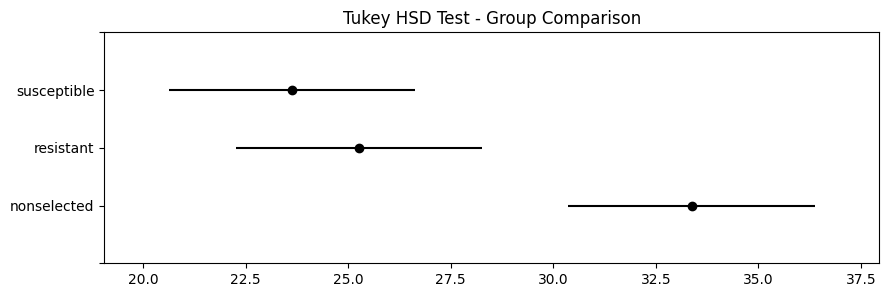

In [34]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

data_melted = df.melt(var_name='Group', value_name='Value')

tukey_test = pairwise_tukeyhsd(endog=data_melted['Value'],  # Numerical values
                               groups=data_melted['Group'],  # Groups
                               alpha=0.05)

print(tukey_test.summary())


fig = tukey_test.plot_simultaneous()
fig.set_size_inches(10, 3)
plt.title('Tukey HSD Test - Group Comparison')
plt.show()

In [35]:
print("""
Tukey’s HSD test is a post-hoc analysis used after ANOVA to identify which specific group means differ significantly while controlling for Type I error. In our example, ANOVA showed significant differences in fecundity among the NS, RS, and SS genetic lines of Drosophila melanogaster. Tukey’s HSD revealed that both RS and SS lines significantly differed from the NS line, but not from each other, highlighting the impact of selective breeding on fecundity.
""")

from statsmodels.stats.multicomp import pairwise_tukeyhsd

print("""
Using the values from the ANOVA test

  Steps for Tukey's HSD:
1. Calculate the Standard Error (SE) of group differences:
2. Obtain the critical value (𝑞)
3. Calculate the Honestly Significant Difference (HSD)
4. Compare group differences to HSD

""")

import math
n_per_group = 25  # Assuming 25 observations per group

# 1. Calculate the Standard Error (SE)
SE = math.sqrt(MS_within / n_per_group)

# 2. Critical value q (approximate value from Studentized Range Distribution table)
q_value = 3.5  # value for df_between=2, df_within=72, and alpha=0.05

# 3. Calculate HSD
HSD = q_value * SE

# 4. Display HSD
print(f"Calculated HSD: {HSD}")

# Calculate differences between group means
diff_NS_RS = abs(ns_mean - rs_mean)
diff_NS_SS = abs(ns_mean - ss_mean)
diff_RS_SS = abs(rs_mean - ss_mean)

# Compare differences to HSD
print(f"Difference between NS and RS: {diff_NS_RS} - {'Significant' if diff_NS_RS > HSD else 'Not Significant'}")
print(f"Difference between NS and SS: {diff_NS_SS} - {'Significant' if diff_NS_SS > HSD else 'Not Significant'}")
print(f"Difference between RS and SS: {diff_RS_SS:.3f} - {'Significant' if diff_RS_SS > HSD else 'Not Significant'}")




Tukey’s HSD test is a post-hoc analysis used after ANOVA to identify which specific group means differ significantly while controlling for Type I error. In our example, ANOVA showed significant differences in fecundity among the NS, RS, and SS genetic lines of Drosophila melanogaster. Tukey’s HSD revealed that both RS and SS lines significantly differed from the NS line, but not from each other, highlighting the impact of selective breeding on fecundity.


Using the values from the ANOVA test

  Steps for Tukey's HSD:
1. Calculate the Standard Error (SE) of group differences:
2. Obtain the critical value (𝑞)
3. Calculate the Honestly Significant Difference (HSD)
4. Compare group differences to HSD


Calculated HSD: 6.080483507090534
Difference between NS and RS: 8.115999999999996 - Significant
Difference between NS and SS: 9.744000000000003 - Significant
Difference between RS and SS: 1.628 - Not Significant
